In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
url = "https://github.com/PinkWink/ML_tutorial/raw/master/dataset/titanic.xls"

In [4]:
titanic = pd.read_excel(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


/tmp/ipykernel_2641/2103948092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=titanic, ax=ax[1], palette=["orange","blue"])


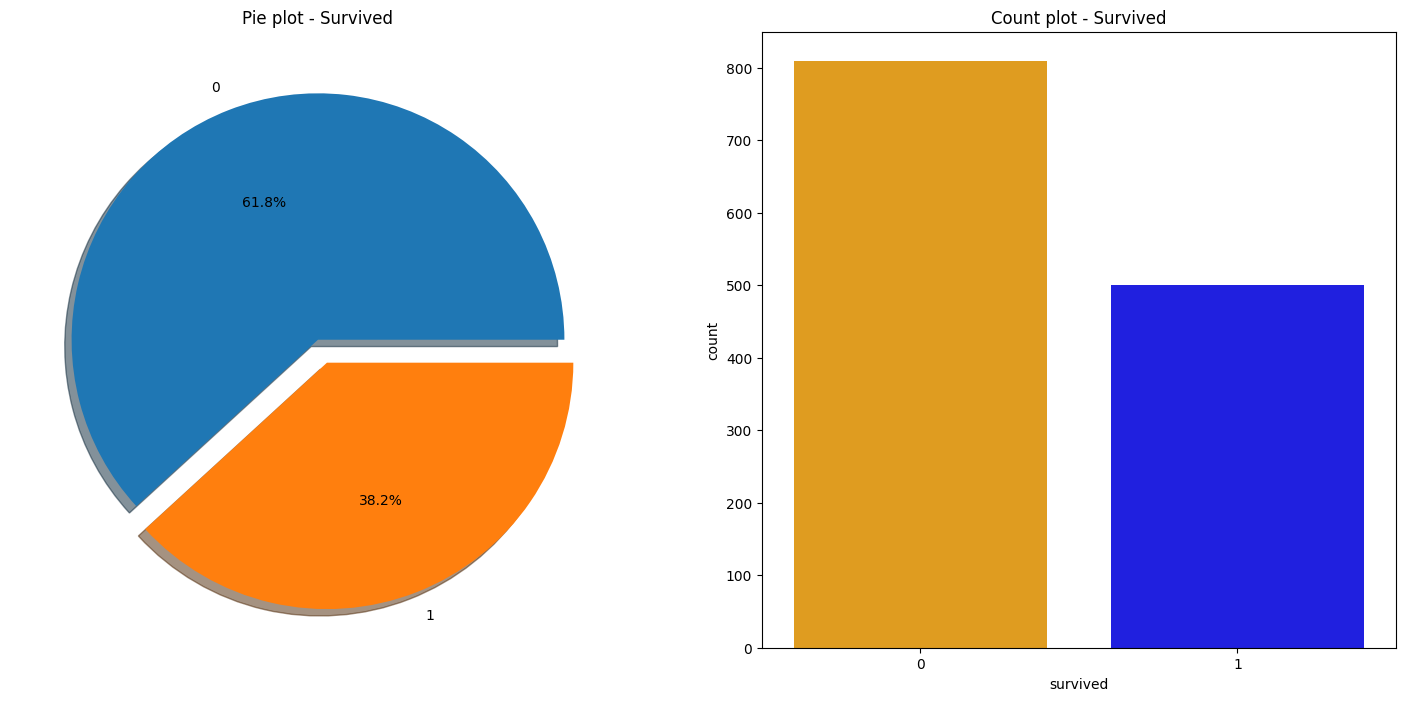

In [5]:
f, ax =plt.subplots(1,2, figsize=(18, 8))
titanic["survived"].value_counts().plot.pie(
    explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")

sns.countplot(x="survived", data=titanic, ax=ax[1], palette=["orange","blue"])
ax[1].set_title("Count plot - Survived")
plt.show()

/tmp/ipykernel_2641/2929166650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=titanic, ax=ax[0], palette=["orange","blue"])


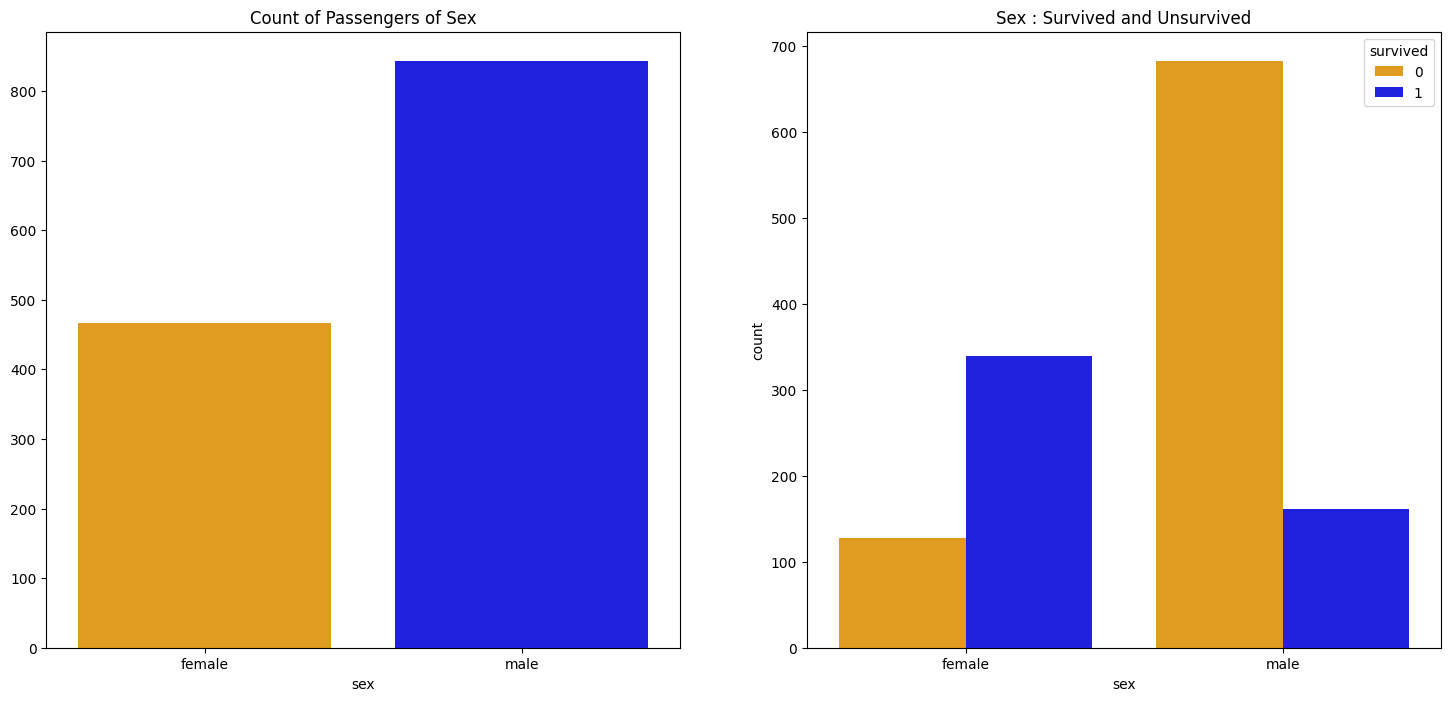

In [6]:
f, ax =plt.subplots(1,2, figsize=(18, 8))
sns.countplot(x="sex", data=titanic, ax=ax[0], palette=["orange","blue"])
ax[0].set_title("Count of Passengers of Sex")
ax[0].set_ylabel("")

sns.countplot(x="sex", hue="survived",data=titanic, ax=ax[1], palette=["orange","blue"])
ax[1].set_title("Sex : Survived and Unsurvived")
plt.show()

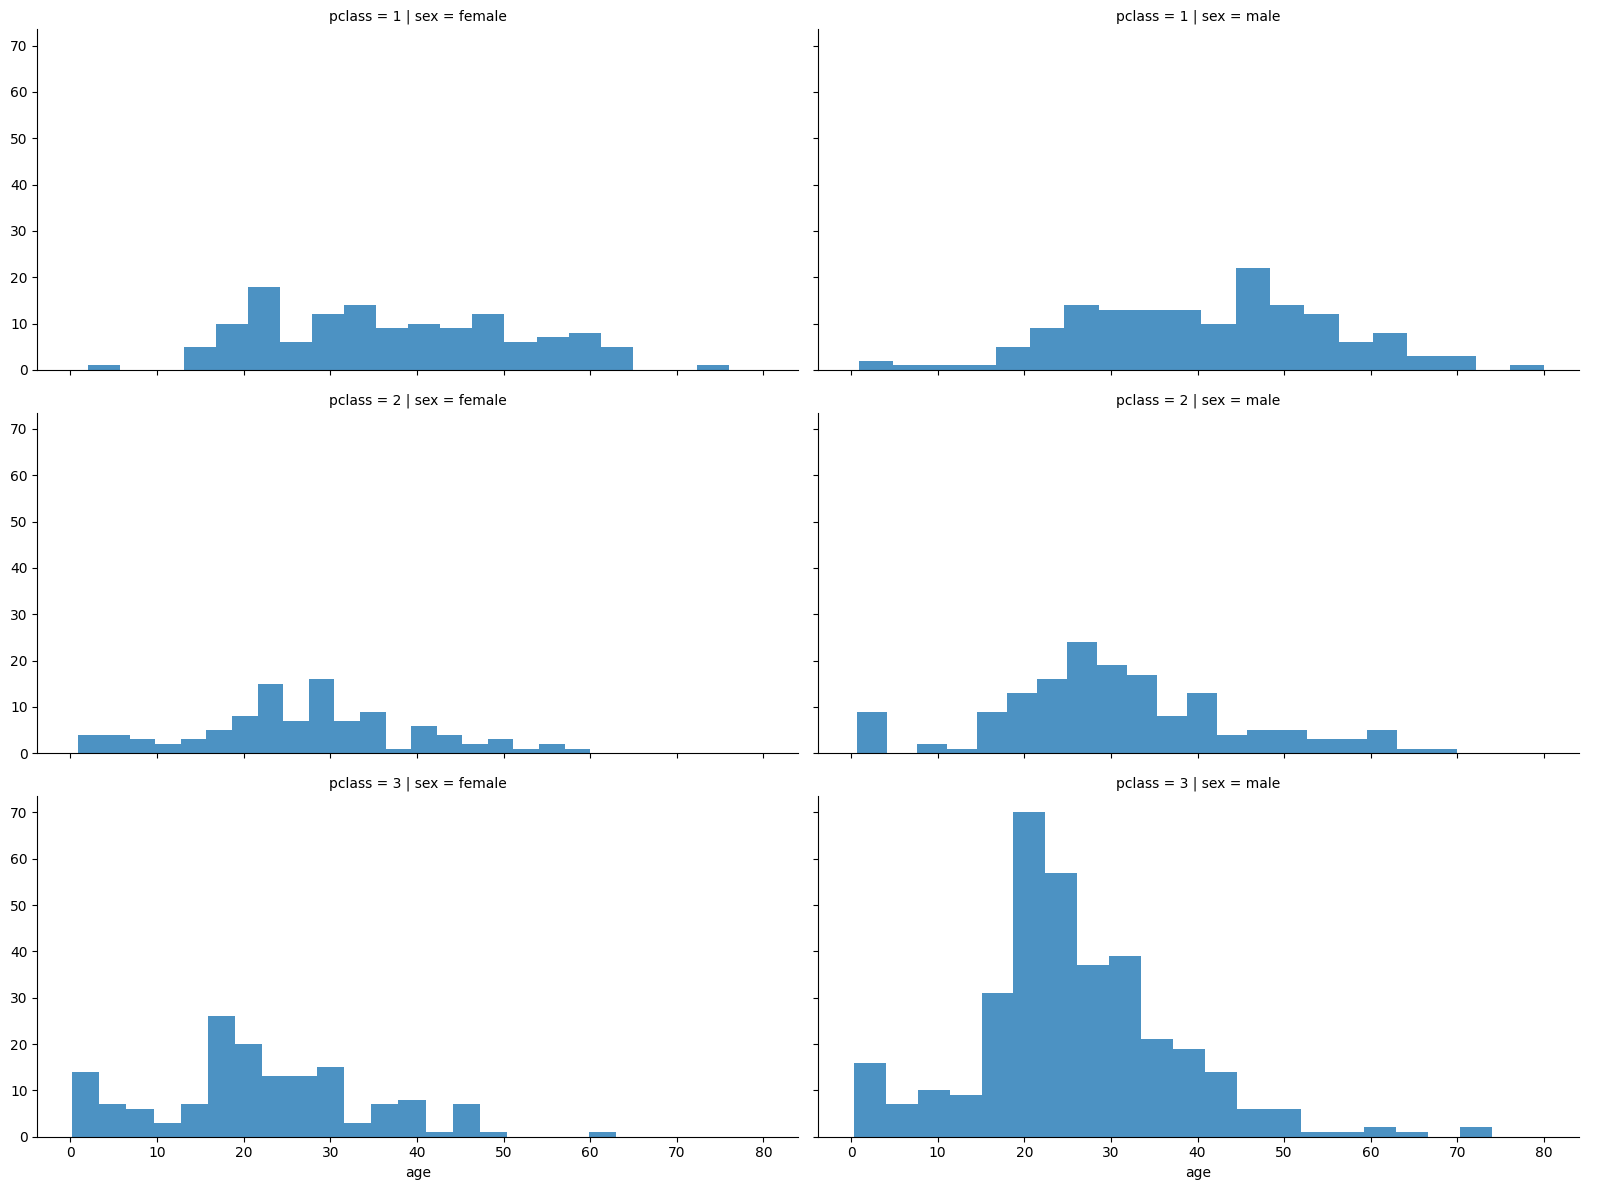

In [7]:
grid = sns.FacetGrid(titanic, row="pclass", col="sex", height=4, aspect=2)
grid.map(plt.hist, "age", bins=20, alpha=.8) #alpha = 투명도
grid.add_legend()


In [8]:
import plotly.express as px 

fig = px.histogram(titanic, x="age")
fig.show()

In [9]:
titanic["age_cat"] = pd.cut(titanic["age"], bins=[0,7,15,30,60,100],
                            include_lowest=True,
                            labels=["baby", "teen", "young", "adult", "old"])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 144.8+ KB


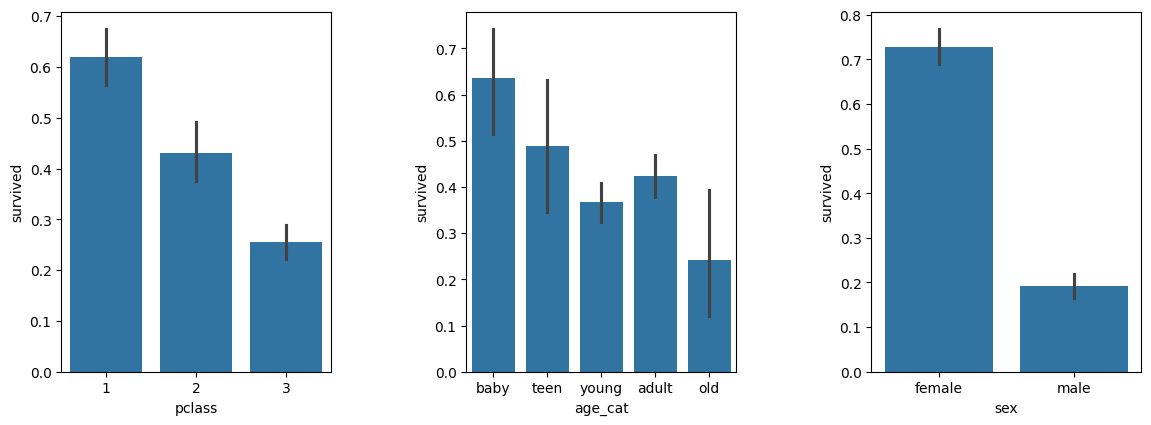

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(131)# 세로(크기) 가로(크기) 위치
sns.barplot()
sns.barplot(x="pclass", y="survived", data=titanic)
plt.subplot(132)
sns.barplot(x="age_cat", y="survived", data=titanic)
plt.subplot(133)
sns.barplot(x="sex", y="survived", data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

/tmp/ipykernel_2641/2740952976.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_2641/2740952976.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_2641/2740952976.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to

Text(0.5, 1.0, 'male')

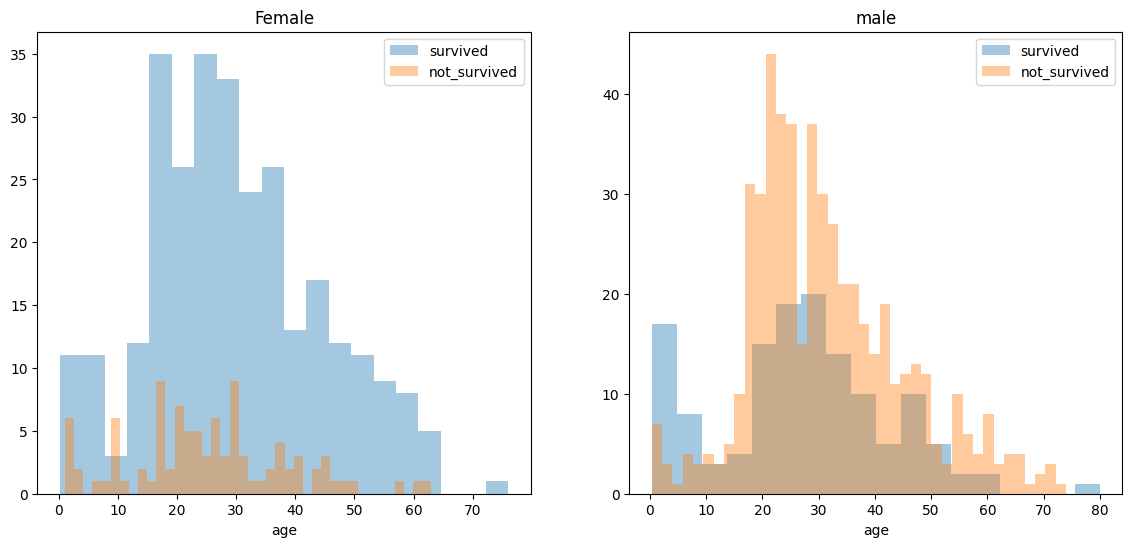

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic["sex"]=="female"]
men = titanic[titanic["sex"]=="male"]

ax = sns.distplot(women[women["survived"]==1]["age"], bins=20,
                 label="survived", ax=axes[0], kde=False)

ax = sns.distplot(women[women["survived"]==0]["age"], bins=40,
                 label="not_survived", ax=axes[0], kde=False)

ax.legend(); ax.set_title("Female")


ax = sns.distplot(men[men["survived"]==1]["age"], bins=18,
                 label="survived", ax=axes[1], kde=False)

ax = sns.distplot(men[men["survived"]==0]["age"], bins=40,
                 label="not_survived", ax=axes[1], kde=False)

ax.legend(); ax.set_title("male")




In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic["sex"])
titanic["gender"] = le.transform(titanic["sex"])
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,0


In [14]:
titanic = titanic[titanic["age"].notnull()]
titanic = titanic[titanic["fare"].notnull()]
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 131.9+ KB


<Axes: >

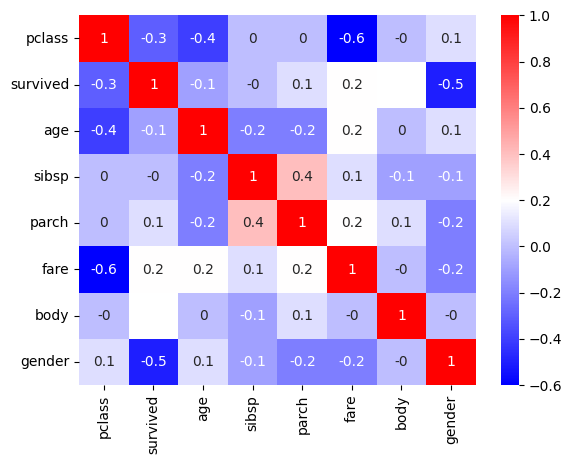

In [19]:
correlation_matrix=titanic.corr(numeric_only=True).round(1)
sns.heatmap(data=correlation_matrix,annot=True,cmap='bwr')#annot = 수치 띄우기

In [16]:
from sklearn.model_selection import train_test_split

x = titanic[["pclass", "age", "sibsp", "parch", "fare", "gender"]]
y = titanic["survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=13)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(x_train, y_train)

pred = dt.predict(x_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [58]:
import numpy as np
dicaprio = np.array([[3,18,0,0,5,1]])
print(dt.predict_proba(dicaprio)[0,1])

0.16728624535315986


/home/rds/venv/test_venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

